# Level 3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:

def apply_chart_styling(ax,fig,title,subtitle,insight_text):
    fig.patch.set_facecolor('#f7f7f7') # Background colors
    ax.set_facecolor('#f7f7f7')

    fig.text(0.3,1.05,title,fontsize=30,fontweight='bold',fontfamily="Franklin Gothic Heavy")
    fig.text(0.25,0.99,subtitle,fontsize=25,fontweight='bold',fontfamily='Segoe UI')

    fig.text(1.1,1.01,'Insight',fontsize=24,fontweight='bold',fontfamily="Segoe UI")
    fig.text(1.1,0.50,insight_text,fontsize=22,fontweight='light',fontfamily='Arial Rounded MT Bold')

    ax.grid(axis='y',linestyle='-',alpha=0.4)
    ax.set_axisbelow('True')

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 16)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])
palette = ["#FF6B6B", "#4ECDC4", "#FFD93D", "#6A5ACD", "#FF8C42", "#00C9A7"]



In [3]:
df=pd.read_csv('Dataset.csv')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task 1 : Predictive Modeling

#### 1. Build a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics. Experiment with different algorithms (e.g.,linear regression,decision trees, random forest) and compare their performance.

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
# Selecting Useful Columns
df = df[['Country Code', 'City', 'Cuisines', 'Average Cost for two',
         'Currency', 'Has Table booking', 'Has Online delivery',
         'Price range', 'Votes', 'Aggregate rating']]


In [7]:
# Performing label encoding for categorical columns
df['Has Table booking']=df['Has Table booking'].map({'Yes':1,'No':0})
df['Has Online delivery']=df['Has Online delivery'].map({'Yes':1,'No':0})

In [8]:
df.head()

,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Votes,Aggregate rating
0,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,3,314,4.8
1,162,Makati City,Japanese,1200,Botswana Pula(P),1,0,3,591,4.5
2,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,4,270,4.4
3,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),0,0,4,365,4.9
4,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),1,0,4,229,4.8


In [9]:
# As we see their are more than one cuisines so it is better to select to first cuisine as Primary Cuisines
df['Primary Cuisines']=df['Cuisines'].str.split(',').str[0]

df.head()

,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Votes,Aggregate rating,Primary Cuisines
0,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,3,314,4.8,French
1,162,Makati City,Japanese,1200,Botswana Pula(P),1,0,3,591,4.5,Japanese
2,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,4,270,4.4,Seafood
3,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),0,0,4,365,4.9,Japanese
4,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),1,0,4,229,4.8,Japanese


In [10]:
# Drop the original "Cuise=ines Column"
df=df.drop(columns=['Cuisines'])
df.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Votes,Aggregate rating,Primary Cuisines
0,162,Makati City,1100,Botswana Pula(P),1,0,3,314,4.8,French
1,162,Makati City,1200,Botswana Pula(P),1,0,3,591,4.5,Japanese
2,162,Mandaluyong City,4000,Botswana Pula(P),1,0,4,270,4.4,Seafood
3,162,Mandaluyong City,1500,Botswana Pula(P),0,0,4,365,4.9,Japanese
4,162,Mandaluyong City,1500,Botswana Pula(P),1,0,4,229,4.8,Japanese


In [11]:
# Divide data into independent and dependent features
X=df.drop(columns=['Aggregate rating'])
y=df['Aggregate rating']

In [12]:
X

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Votes,Primary Cuisines
0,162,Makati City,1100,Botswana Pula(P),1,0,3,314,French
1,162,Makati City,1200,Botswana Pula(P),1,0,3,591,Japanese
2,162,Mandaluyong City,4000,Botswana Pula(P),1,0,4,270,Seafood
3,162,Mandaluyong City,1500,Botswana Pula(P),0,0,4,365,Japanese
4,162,Mandaluyong City,1500,Botswana Pula(P),1,0,4,229,Japanese
...,...,...,...,...,...,...,...,...,...
9546,208,��stanbul,80,Turkish Lira(TL),0,0,3,788,Turkish
9547,208,��stanbul,105,Turkish Lira(TL),0,0,3,1034,World Cuisine
9548,208,��stanbul,170,Turkish Lira(TL),0,0,4,661,Italian
9549,208,��stanbul,120,Turkish Lira(TL),0,0,4,901,Restaurant Cafe


In [13]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [14]:
# Divide columns into categorical columns and numerical columns
cat_cols=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_cols.append(col)

In [15]:
cat_cols

['City', 'Currency', 'Primary Cuisines']

In [16]:

num_cols=[]
for col in df.columns:
    if df[col].dtype=='int64' or df[col].dtype=='float64' :
        num_cols.append(col)

In [17]:
num_cols

['Country Code',
 'Average Cost for two',
 'Has Table booking',
 'Has Online delivery',
 'Price range',
 'Votes',
 'Aggregate rating']

In [18]:
# Create a pipeline to automate preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [19]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ],
    remainder='passthrough'
)

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVR": SVR()
}

In [21]:
# Split data into train test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
X_train.shape

(6685, 9)

In [23]:
X_test.shape

(2866, 9)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
result = {}

for name, model in models.items():

    pipe = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    result[name] = {"RMSE": rmse, "R2_score": r2}


In [26]:
results=pd.DataFrame(result).T
results

,RMSE,R2_score
Linear Regression,1.224364,0.340301
Decision Tree,0.430246,0.918538
Random Forest,0.333484,0.951059
SVR,1.503623,0.005047


## Task 2 : Customer Preference Analysis

#### 1. Analyze the relationship between the type of cuisine and the restaurant's rating.

In [27]:
df_=pd.read_csv("Dataset.csv")
df_.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [28]:
cuisine_series = df_['Cuisines'].str.split(',').explode().str.strip()
temp = pd.DataFrame({'Cuisine': cuisine_series,'Rating': df_['Aggregate rating'] })

cuisine_rating = temp.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False)
print(cuisine_rating.head())


Cuisine
Sunda        4.900000
B�_rek       4.700000
Taiwanese    4.650000
Ramen        4.500000
Dim Sum      4.466667
Name: Rating, dtype: float64


In [29]:
# most popular cuisines based on the number of votes
temp_ = pd.DataFrame({'Cuisine': cuisine_series,'Votes': df_['Votes'] })

cuisine_votes = temp_.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False)
print(cuisine_votes.head())

Cuisine
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
Name: Votes, dtype: int64


In [30]:
# Number of restaurants per cuisine
cuisine_counts = cuisine_series.value_counts()
# Merge with average ratings
cuisine_rating_df = pd.DataFrame({'avg_rating': cuisine_rating,'count': cuisine_counts})

popular_high_rating = cuisine_rating_df[cuisine_rating_df['count'] >= 20].sort_values('avg_rating', ascending=False)
print(popular_high_rating.head(20))

               avg_rating  count
International    4.247619     21
Southern         4.129167     24
Vegetarian       4.073913     23
Sandwich         4.066038     53
Grill            4.057143     21
Steak            3.985484     62
Sushi            3.973333     75
Goan             3.970000     20
Breakfast        3.965854     41
Mediterranean    3.948214    112
Bar Food         3.933333     39
Vietnamese       3.923810     21
Indian           3.918571     70
European         3.910811    148
BBQ              3.903030     33
French           3.862069     29
Seafood          3.862069    174
Asian            3.815021    233
Japanese         3.797037    135
Malaysian        3.763636     22


## Task 3 : Data Visualization

#### 1. Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

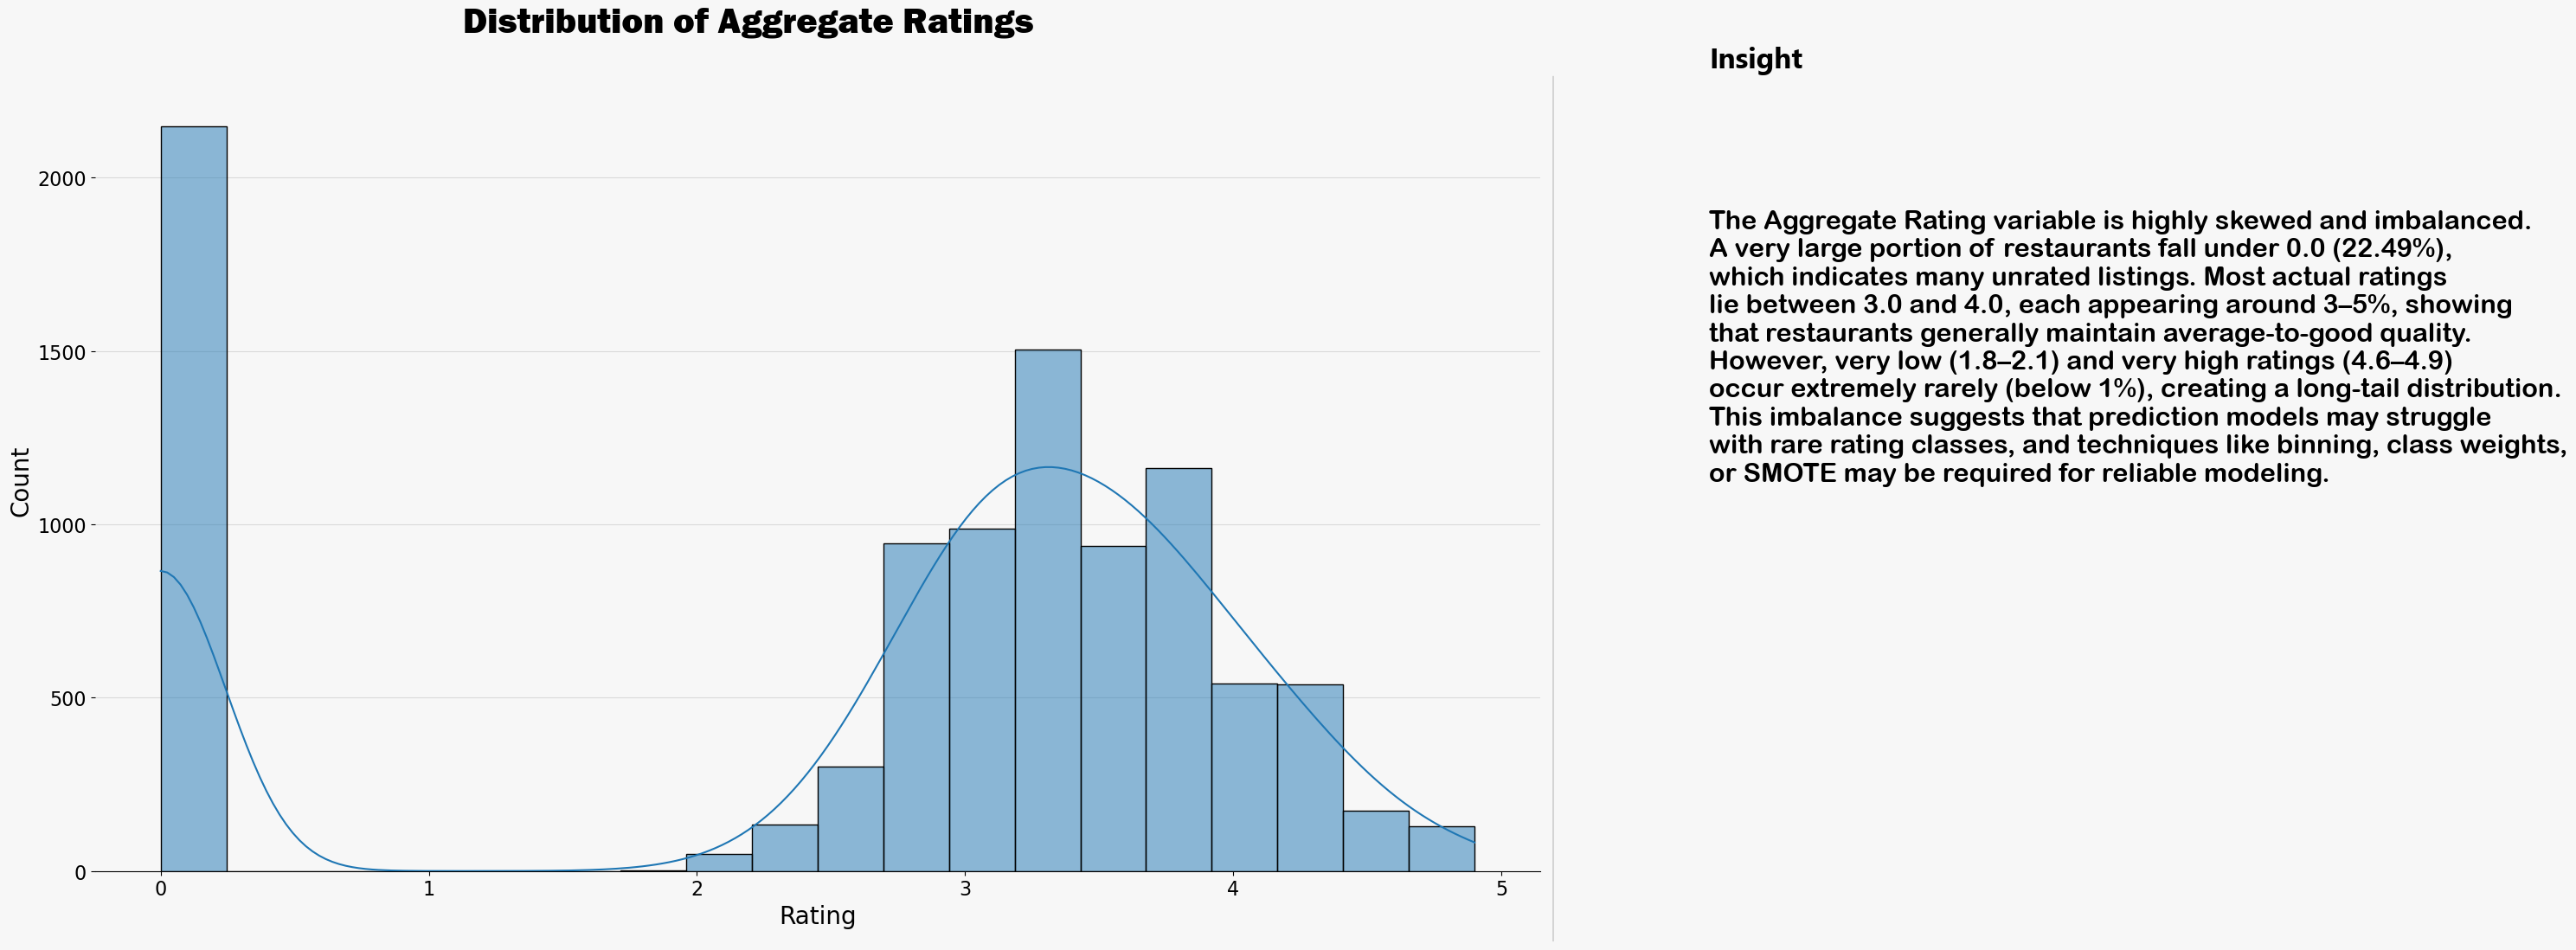

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plot histogram chart
sns.histplot(df['Aggregate rating'], kde=True, bins=20)

plt.xlabel("Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)

apply_chart_styling(ax=ax,fig=fig,title="Distribution of Aggregate Ratings",subtitle="",insight_text='''
The Aggregate Rating variable is highly skewed and imbalanced. 
A very large portion of restaurants fall under 0.0 (22.49%), 
which indicates many unrated listings. Most actual ratings 
lie between 3.0 and 4.0, each appearing around 3–5%, showing
that restaurants generally maintain average-to-good quality. 
However, very low (1.8–2.1) and very high ratings (4.6–4.9) 
occur extremely rarely (below 1%), creating a long-tail distribution.
This imbalance suggests that prediction models may struggle
with rare rating classes, and techniques like binning, class weights,
or SMOTE may be required for reliable modeling.
'''
)

plt.tight_layout()
plt.show()


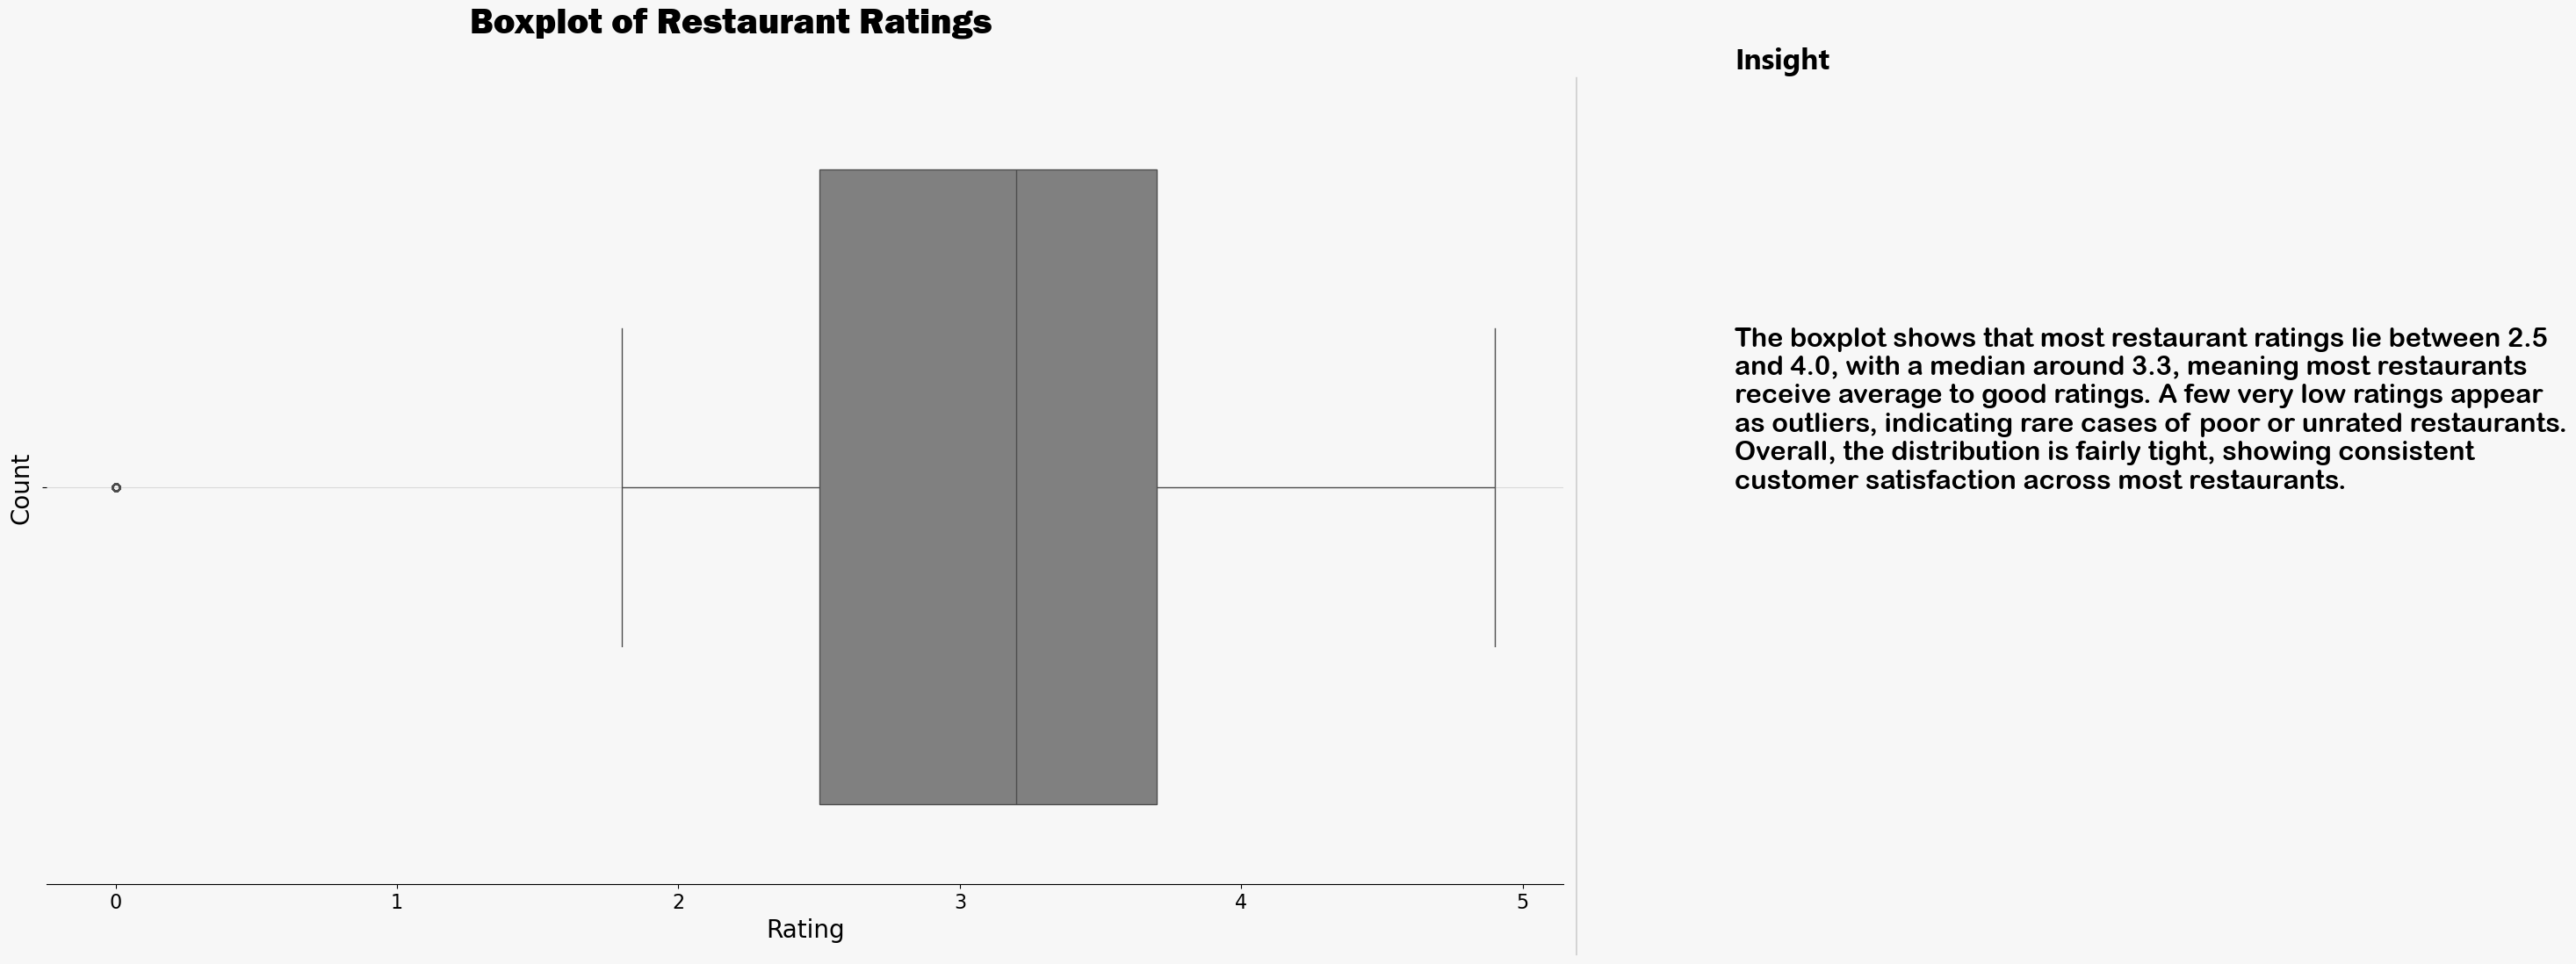

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plot box chart
sns.boxplot(x=df['Aggregate rating'],color='grey')

plt.xlabel("Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)

apply_chart_styling(ax=ax,fig=fig,title="Boxplot of Restaurant Ratings",subtitle="",insight_text='''
The boxplot shows that most restaurant ratings lie between 2.5
and 4.0, with a median around 3.3, meaning most restaurants 
receive average to good ratings. A few very low ratings appear
as outliers, indicating rare cases of poor or unrated restaurants.
Overall, the distribution is fairly tight, showing consistent 
customer satisfaction across most restaurants.
'''
)

plt.tight_layout()
plt.show()


#### 2. Compare Average Ratings of Different Cuisines

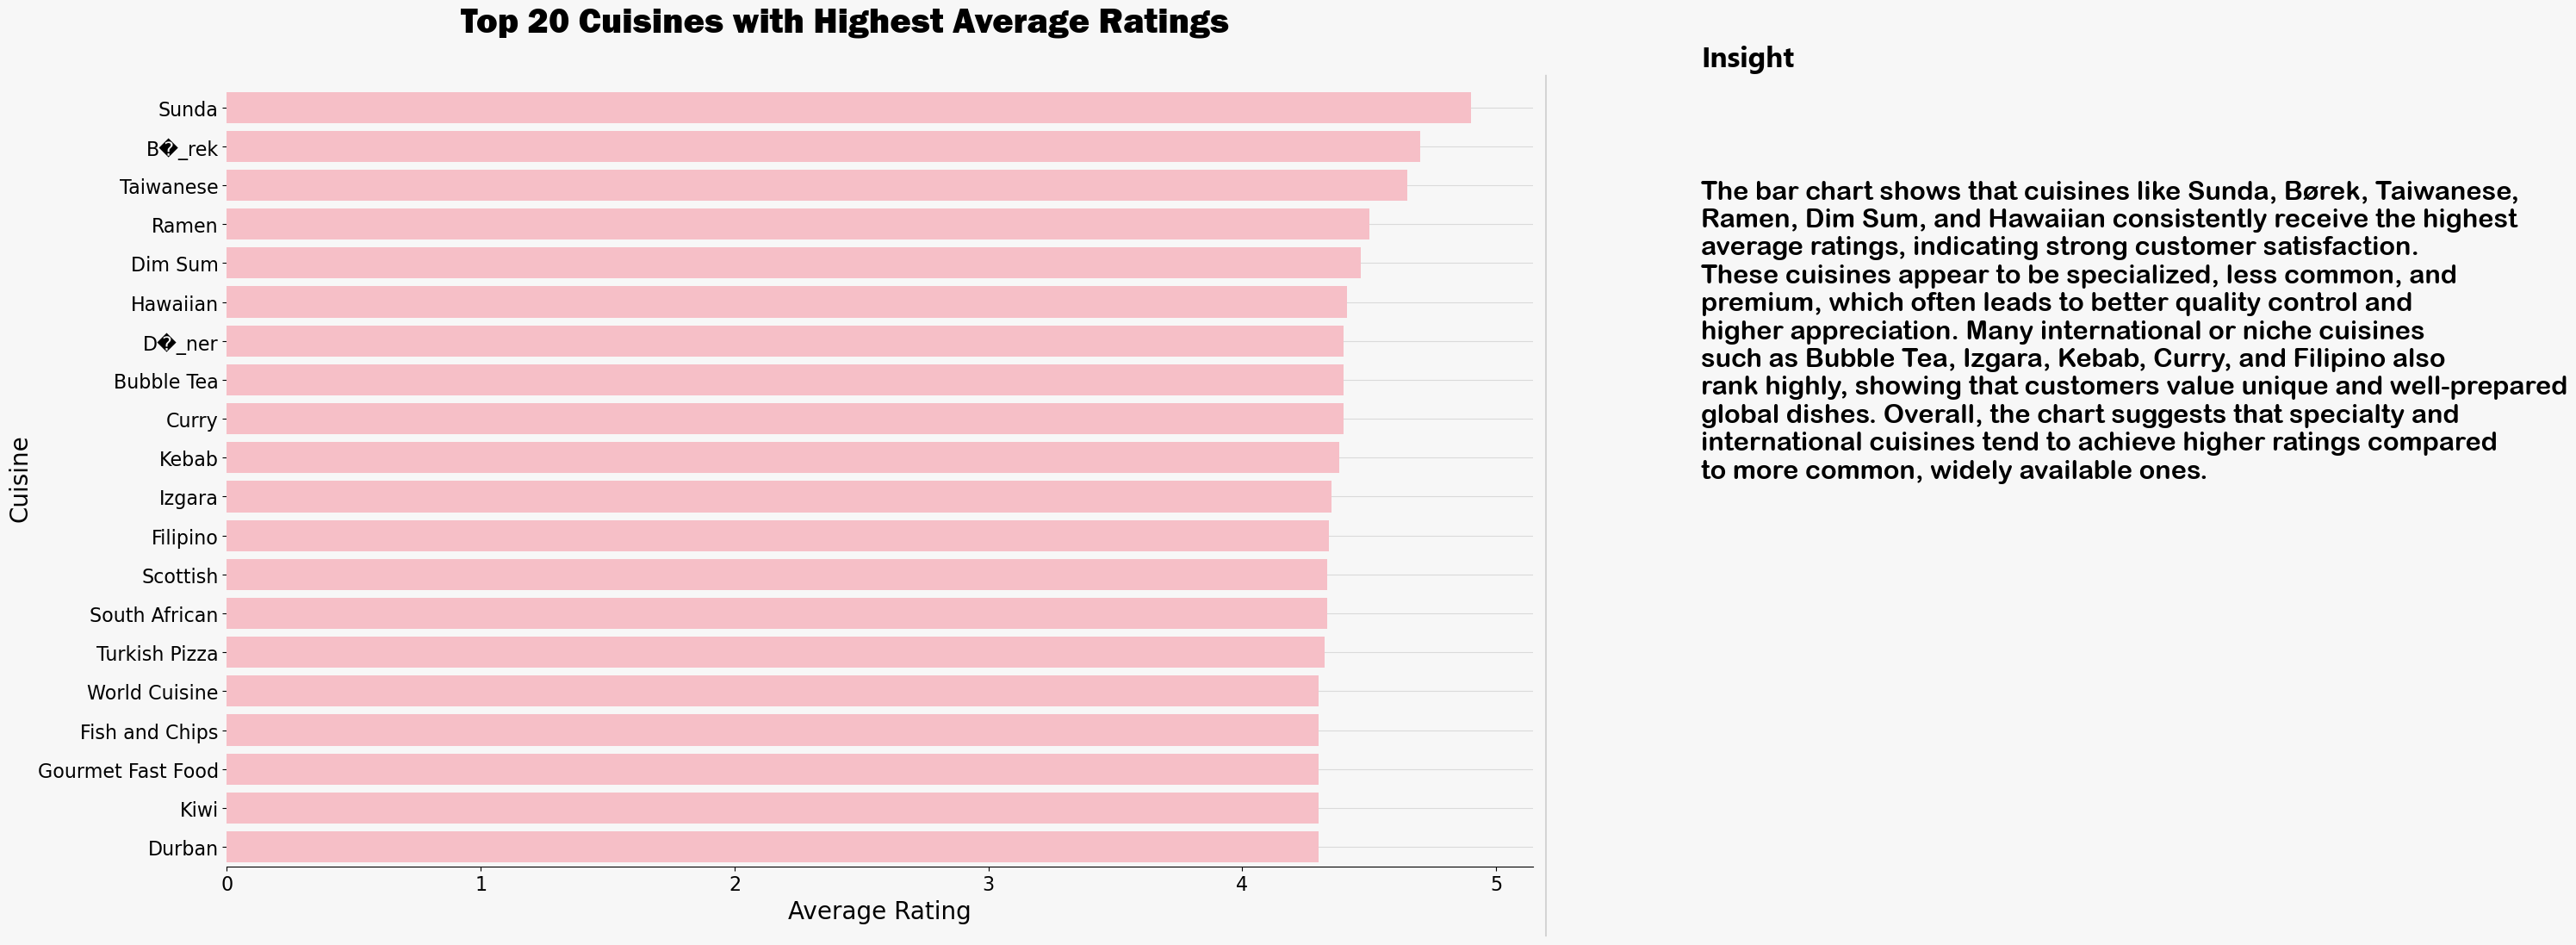

In [117]:
top_cuisine_rating = temp.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plot bar chart
sns.barplot(x=top_cuisine_rating.values, y=top_cuisine_rating.index,color='lightpink')

plt.xlabel("Average Rating",fontsize=20)
plt.ylabel("Cuisine",fontsize=20)

apply_chart_styling(ax=ax,fig=fig,title="Top 20 Cuisines with Highest Average Ratings",subtitle="",insight_text='''
The bar chart shows that cuisines like Sunda, Børek, Taiwanese,
Ramen, Dim Sum, and Hawaiian consistently receive the highest
average ratings, indicating strong customer satisfaction.
These cuisines appear to be specialized, less common, and
premium, which often leads to better quality control and
higher appreciation. Many international or niche cuisines
such as Bubble Tea, Izgara, Kebab, Curry, and Filipino also
rank highly, showing that customers value unique and well-prepared
global dishes. Overall, the chart suggests that specialty and
international cuisines tend to achieve higher ratings compared
to more common, widely available ones.
'''
)

plt.tight_layout()
plt.show()

#### 3. Visualize the relationship between various features and the target variable to gain insights.

In [120]:
dataset=pd.read_csv('Dataset.csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


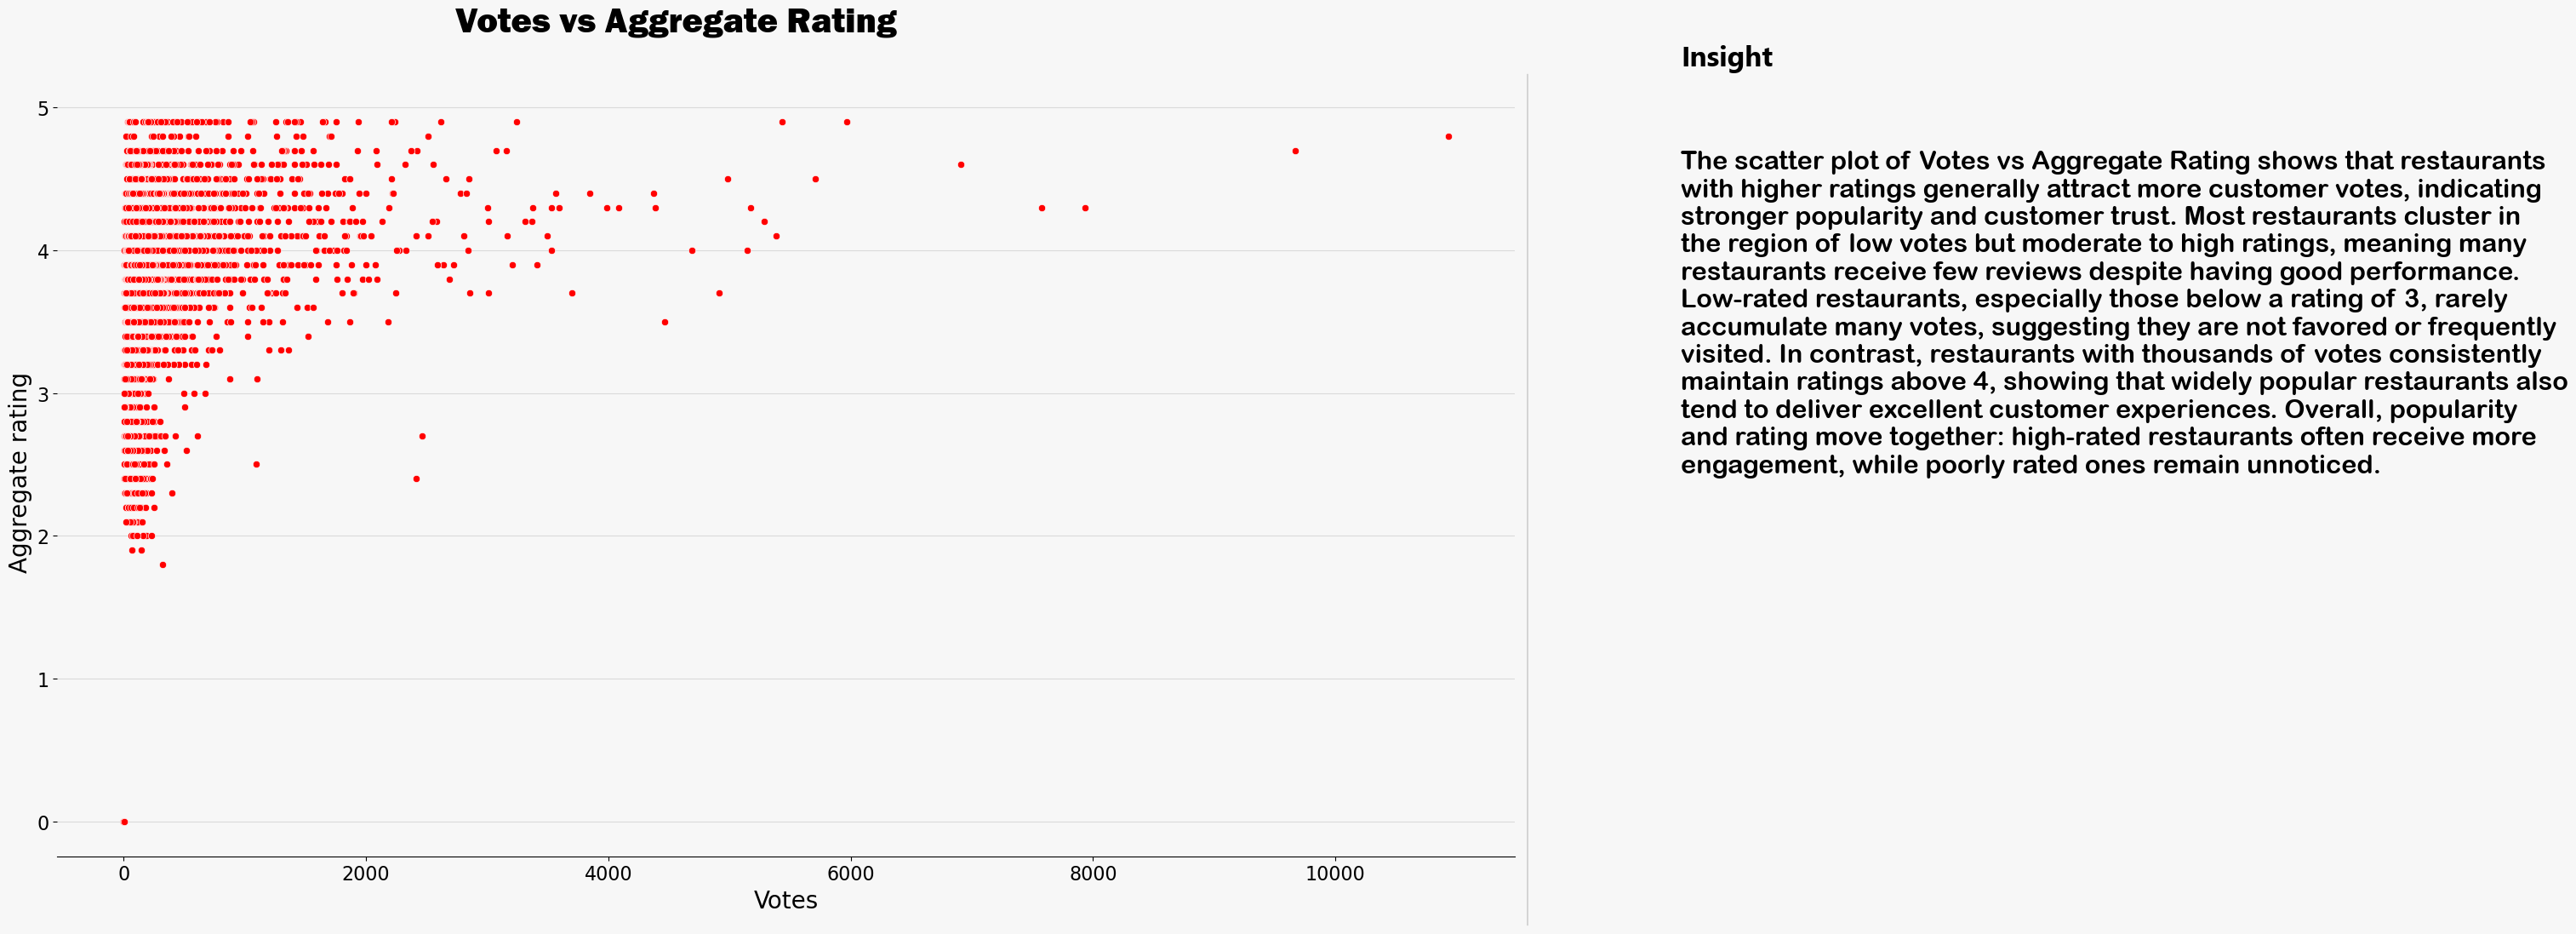

In [149]:
# Votes vs Aggregate Rating
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot scatter plot
sns.scatterplot(x='Votes', y='Aggregate rating', data=df,color='r')
plt.xlabel("Votes",fontsize=20)
plt.ylabel("Aggregate rating",fontsize=20)

# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Votes vs Aggregate Rating",subtitle='',insight_text='''
The scatter plot of Votes vs Aggregate Rating shows that restaurants
with higher ratings generally attract more customer votes, indicating
stronger popularity and customer trust. Most restaurants cluster in
the region of low votes but moderate to high ratings, meaning many
restaurants receive few reviews despite having good performance.
Low-rated restaurants, especially those below a rating of 3, rarely
accumulate many votes, suggesting they are not favored or frequently
visited. In contrast, restaurants with thousands of votes consistently
maintain ratings above 4, showing that widely popular restaurants also
tend to deliver excellent customer experiences. Overall, popularity
and rating move together: high-rated restaurants often receive more
engagement, while poorly rated ones remain unnoticed.
''')
plt.tight_layout()
plt.show()

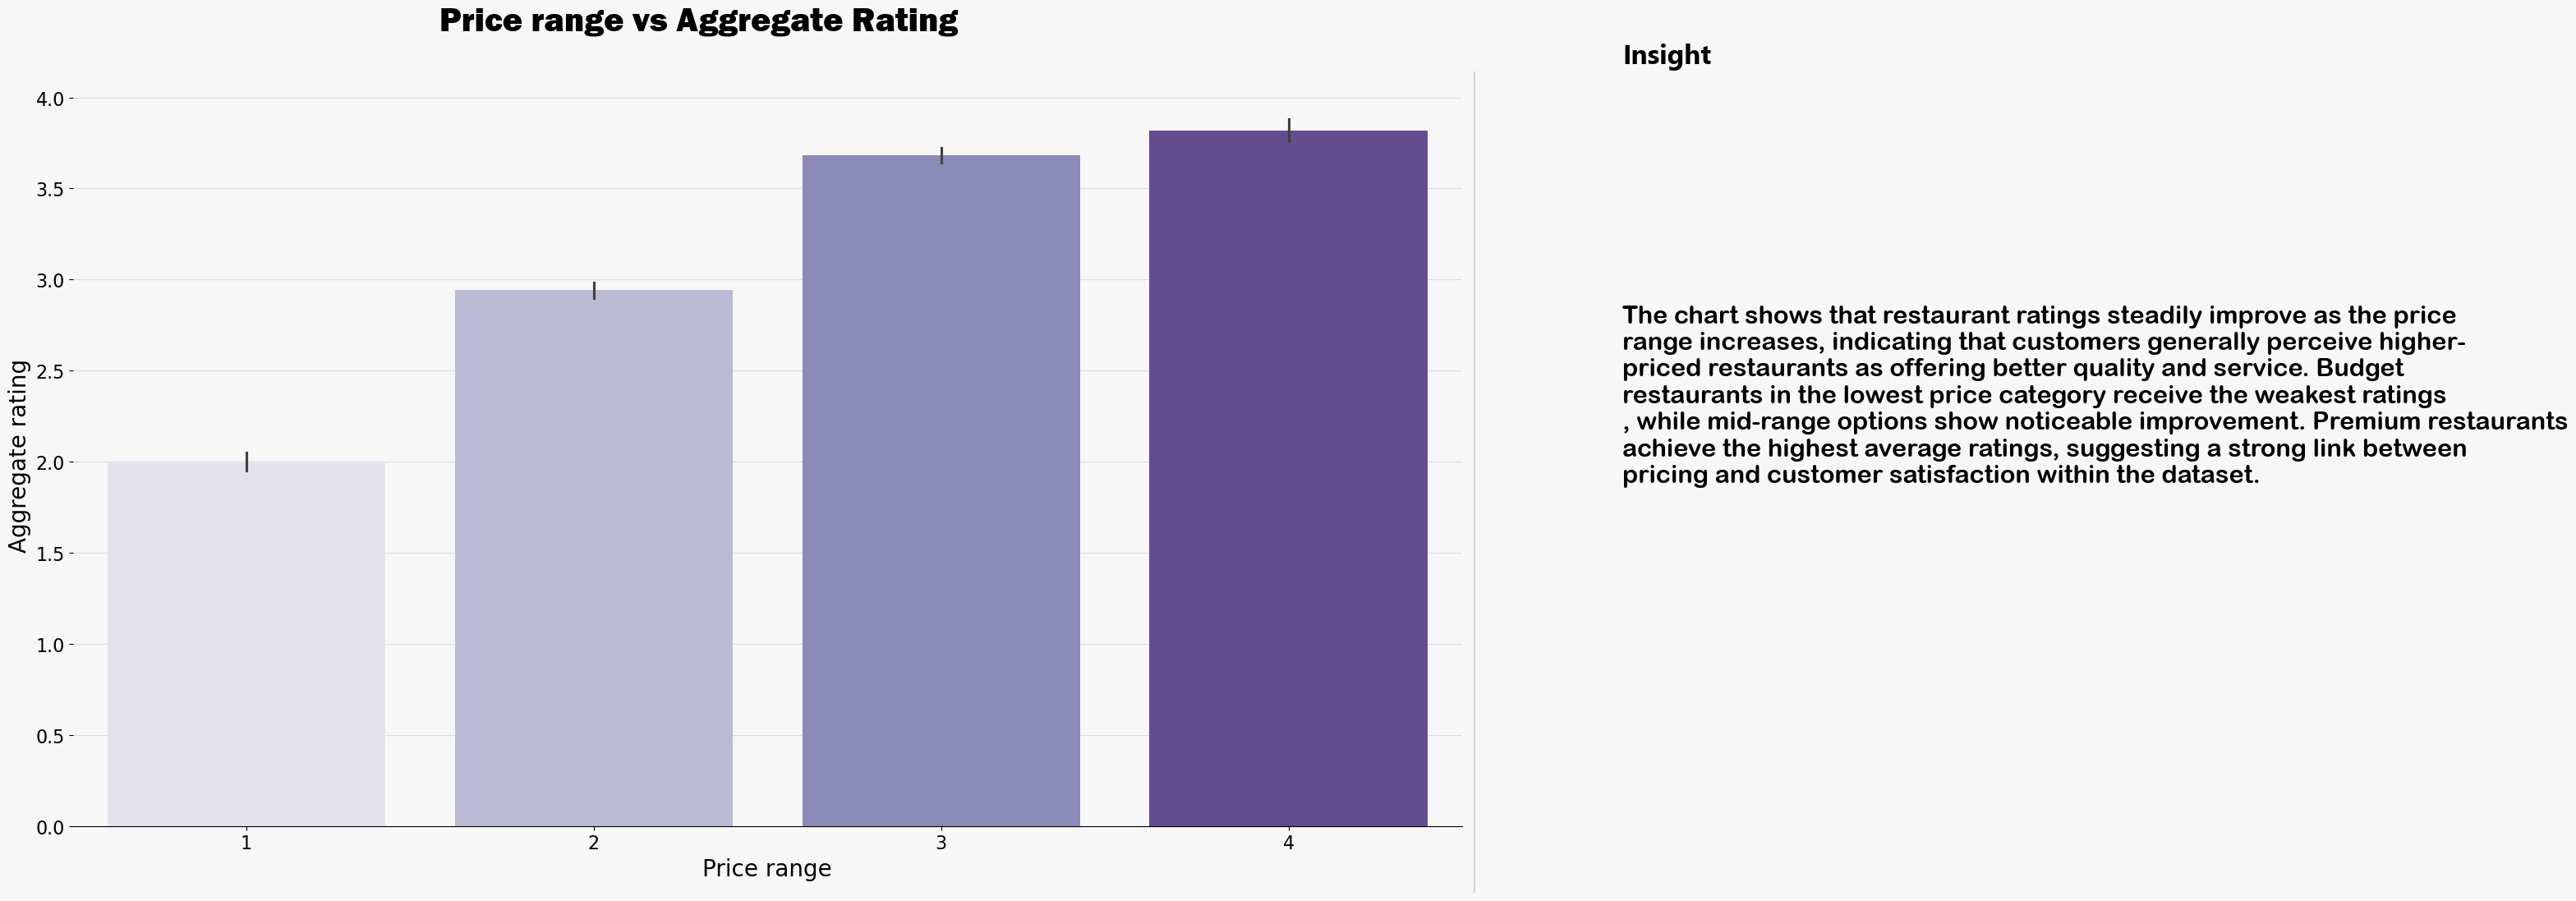

In [163]:
# Price range vs Aggregate Rating
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot barS plot
sns.barplot(x='Price range', y='Aggregate rating', data=df, palette='Purples')
plt.xlabel("Price range",fontsize=20)
plt.ylabel("Aggregate rating",fontsize=20)

# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Price range vs Aggregate Rating",subtitle='',insight_text='''
The chart shows that restaurant ratings steadily improve as the price
range increases, indicating that customers generally perceive higher-
priced restaurants as offering better quality and service. Budget 
restaurants in the lowest price category receive the weakest ratings
, while mid-range options show noticeable improvement. Premium restaurants
achieve the highest average ratings, suggesting a strong link between
pricing and customer satisfaction within the dataset.''')
plt.tight_layout()
plt.show()

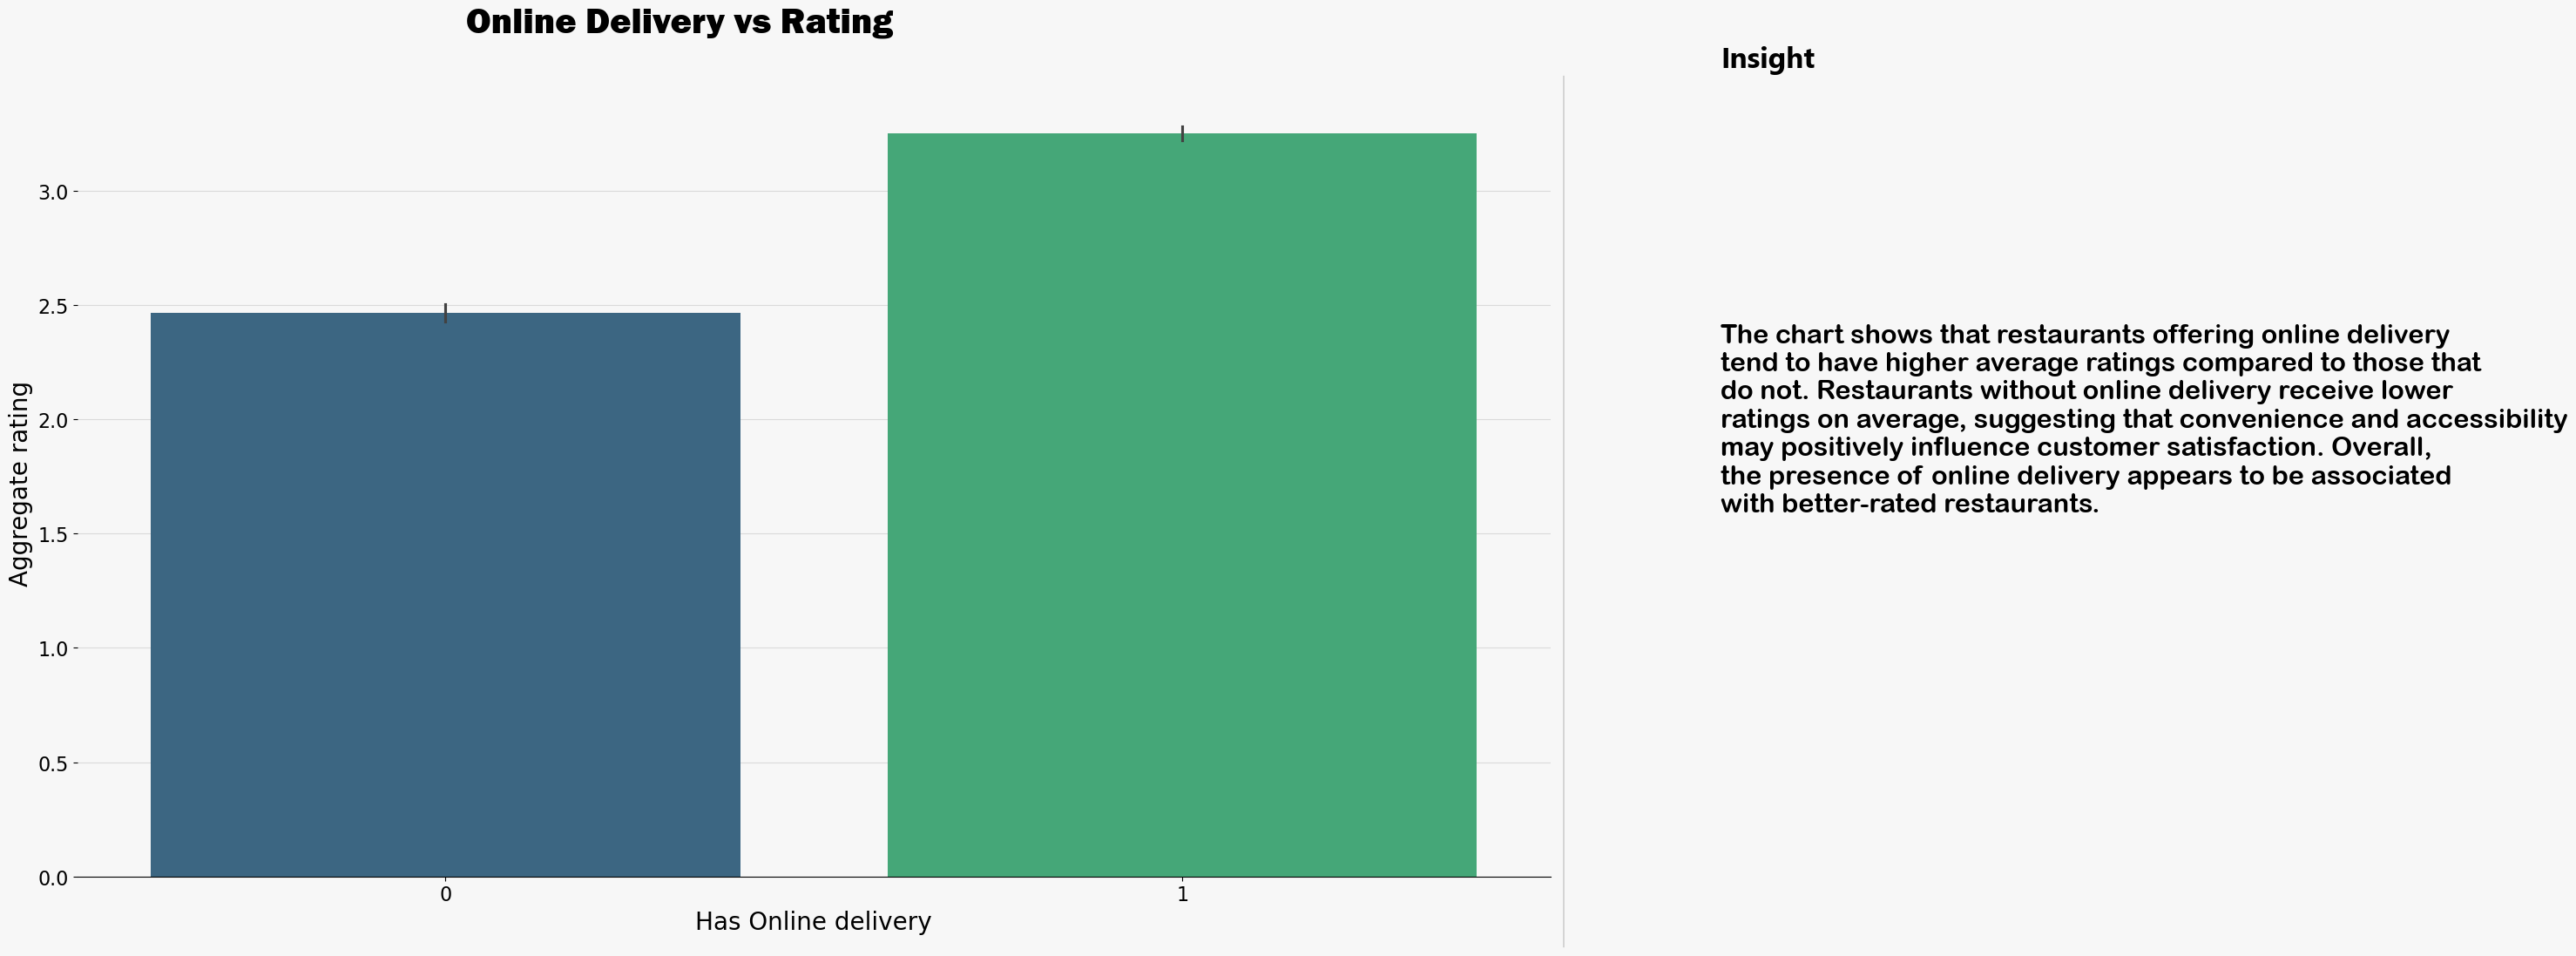

In [151]:
# Online Delivery vs Rating
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot bar plot
sns.barplot(x='Has Online delivery', y='Aggregate rating', data=df,palette='viridis')
plt.xlabel("Has Online delivery",fontsize=20)
plt.ylabel("Aggregate rating",fontsize=20)

# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Online Delivery vs Rating",subtitle='',insight_text='''
The chart shows that restaurants offering online delivery
tend to have higher average ratings compared to those that
do not. Restaurants without online delivery receive lower
ratings on average, suggesting that convenience and accessibility
may positively influence customer satisfaction. Overall, 
the presence of online delivery appears to be associated
with better-rated restaurants.''')
plt.tight_layout()
plt.show()

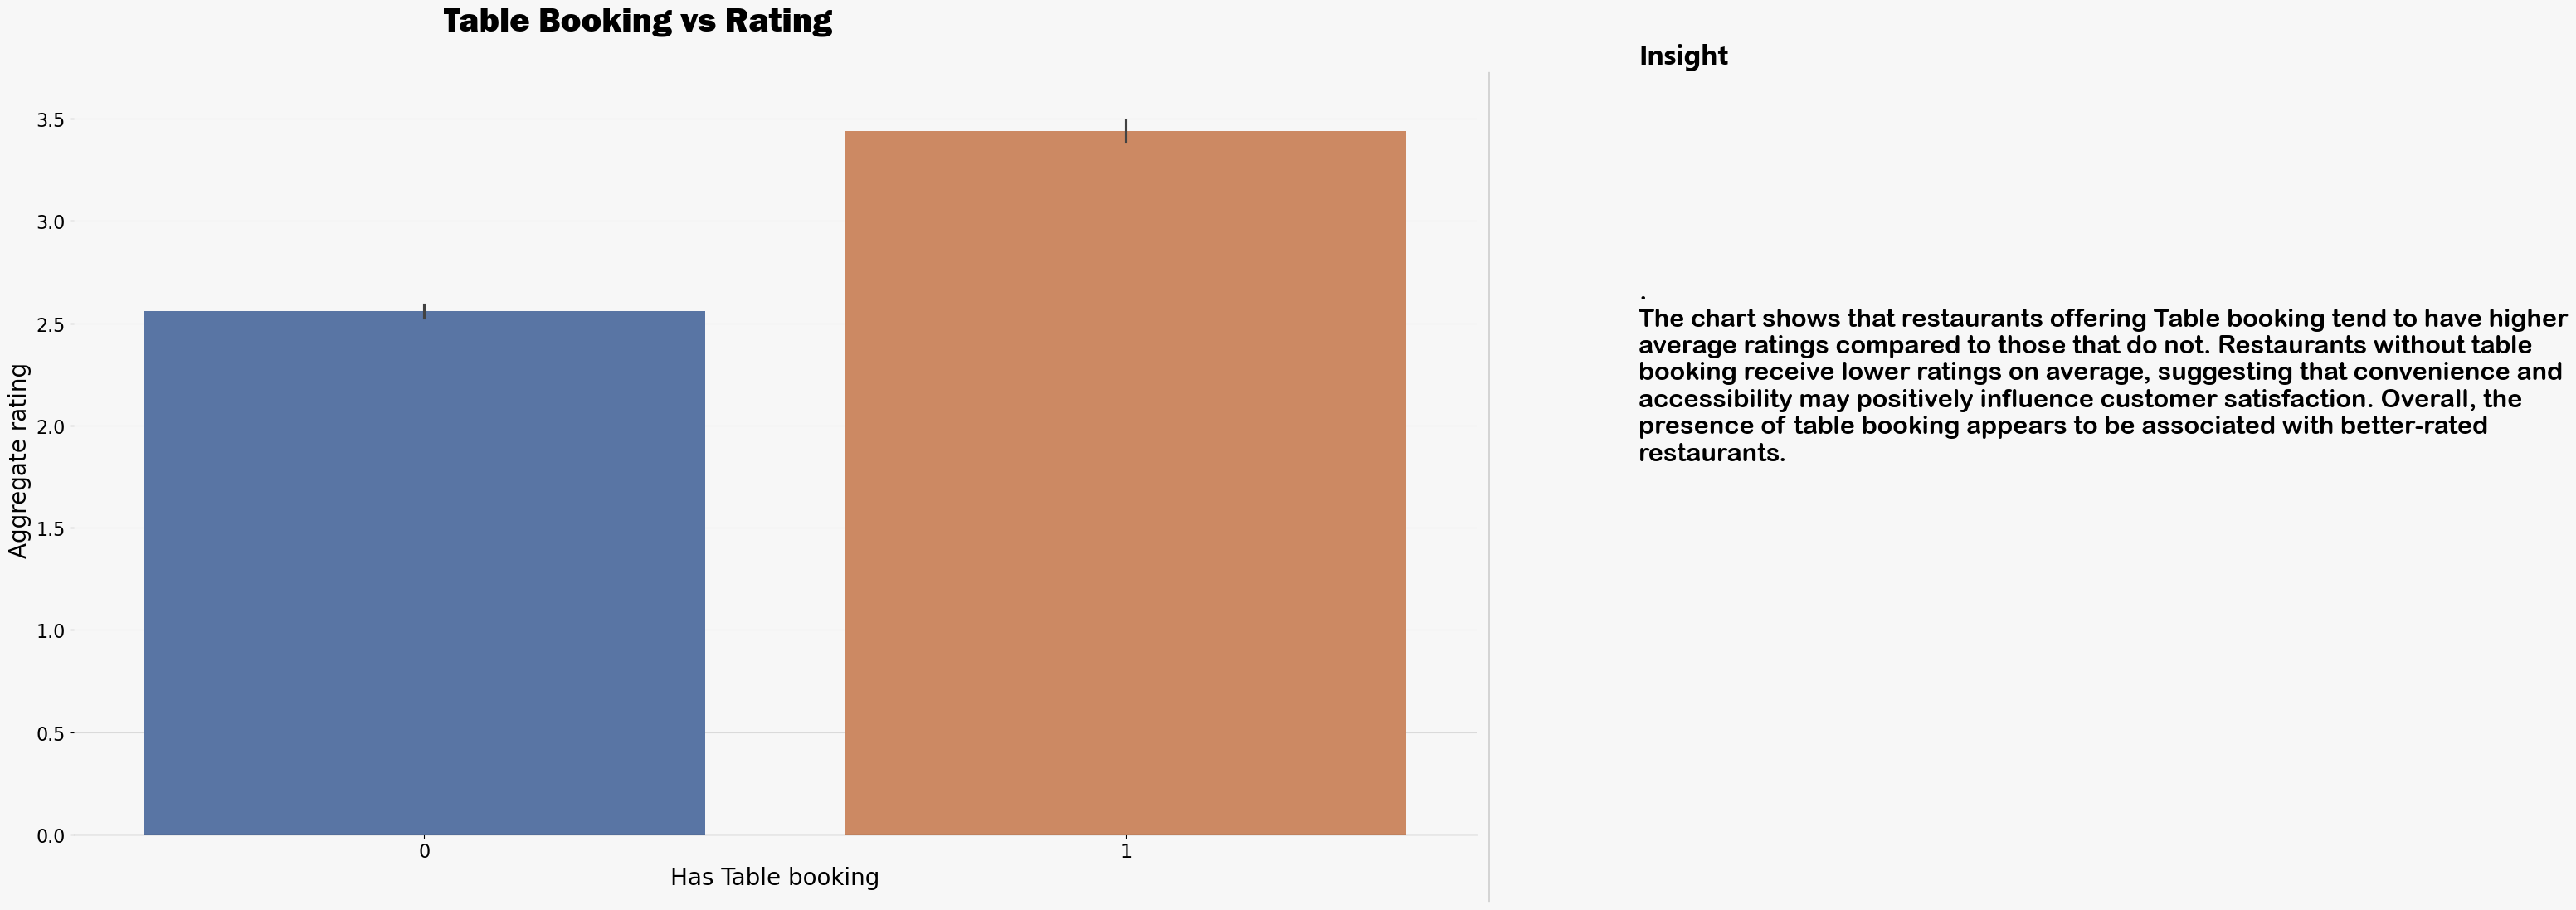

In [160]:
# Table Booking vs Rating
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot bar plot
sns.barplot(x='Has Table booking', y='Aggregate rating', data=df,palette='deep')
plt.xlabel("Has Table booking",fontsize=20)
plt.ylabel("Aggregate rating",fontsize=20)

# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Table Booking vs Rating",subtitle='',insight_text='''.
The chart shows that restaurants offering Table booking tend to have higher
average ratings compared to those that do not. Restaurants without table
booking receive lower ratings on average, suggesting that convenience and
accessibility may positively influence customer satisfaction. Overall, the
presence of table booking appears to be associated with better-rated
restaurants.
''')
plt.tight_layout()
plt.show()

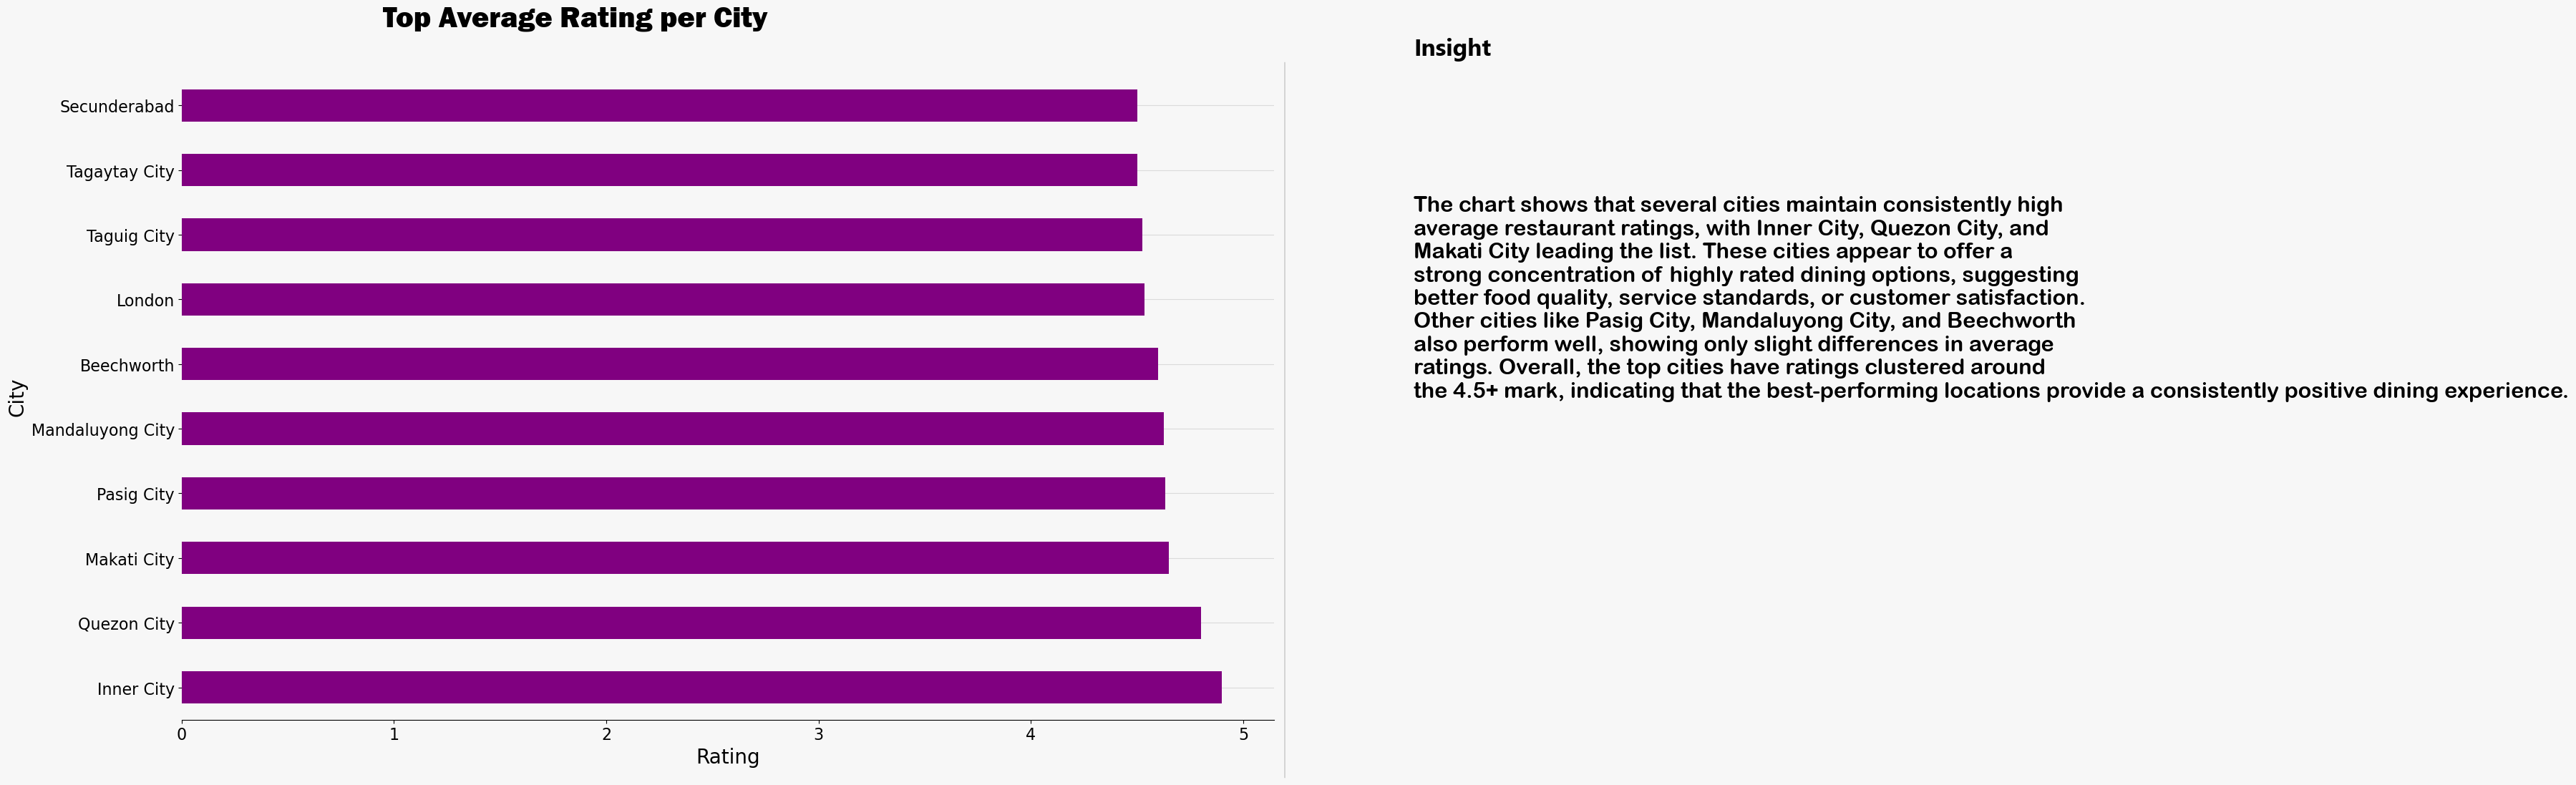

In [164]:
# Top Average Rating per City
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

fig,ax=plt.subplots(1,1,figsize=(18,10))

city_rating.plot(kind='barh',color='purple')
plt.xlabel("Rating",fontsize=20)
plt.ylabel("City",fontsize=20)

# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Top Average Rating per City",subtitle='',insight_text='''
The chart shows that several cities maintain consistently high
average restaurant ratings, with Inner City, Quezon City, and
Makati City leading the list. These cities appear to offer a
strong concentration of highly rated dining options, suggesting
better food quality, service standards, or customer satisfaction.
Other cities like Pasig City, Mandaluyong City, and Beechworth
also perform well, showing only slight differences in average
ratings. Overall, the top cities have ratings clustered around
the 4.5+ mark, indicating that the best-performing locations provide a consistently positive dining experience.
''')
plt.tight_layout()
plt.show()